In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r WestIndies_2019

In [5]:
WestIndies_2019

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
14,14,FA Allen (WI),8,6,3,64,51,21.33,49,130.61,...,229,4,2/40,57.25,6.18,55.5,0,0,5,0
15,15,SW Ambris (WI),8,7,1,323,148,53.83,327,98.77,...,-,-,-,-,-,-,-,-,2,0
41,41,D Bishoo (WI),5,2,1,9,9*,9.00,9,100.00,...,170,1,1/78,170.00,7.08,144.0,0,0,0,0
44,44,CR Brathwaite (WI),16,11,1,236,101,23.60,223,105.82,...,603,17,4/63,35.47,6.68,31.8,1,0,2,0
45,45,DM Bravo (WI),13,11,3,188,61,23.50,211,89.09,...,-,-,-,-,-,-,-,-,3,0
51,51,JD Campbell (WI),6,5,0,248,179,49.60,214,115.88,...,13,0,-,-,13.00,-,0,0,0,0
53,53,JL Carter (WI),5,3,1,57,43*,28.50,58,98.27,...,19,1,1/19,19.00,9.50,12.0,0,0,0,0
60,60,RL Chase (WI),14,9,1,321,94,40.12,393,81.67,...,362,8,3/30,45.25,4.52,60.0,0,0,4,0
65,65,SS Cottrell (WI),24,10,5,62,17,12.40,79,78.48,...,1024,31,5/46,33.03,5.80,34.1,1,1,17,0
85,85,SO Dowrich (WI),1,1,0,6,6,6.00,8,75.00,...,-,-,-,-,-,-,-,-,0,0


In [6]:
WestIndies_2019=WestIndies_2019.reset_index()

In [7]:
WestIndies_2019

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,14,14,FA Allen (WI),8,6,3,64,51,21.33,49,...,229,4,2/40,57.25,6.18,55.5,0,0,5,0
1,15,15,SW Ambris (WI),8,7,1,323,148,53.83,327,...,-,-,-,-,-,-,-,-,2,0
2,41,41,D Bishoo (WI),5,2,1,9,9*,9.00,9,...,170,1,1/78,170.00,7.08,144.0,0,0,0,0
3,44,44,CR Brathwaite (WI),16,11,1,236,101,23.60,223,...,603,17,4/63,35.47,6.68,31.8,1,0,2,0
4,45,45,DM Bravo (WI),13,11,3,188,61,23.50,211,...,-,-,-,-,-,-,-,-,3,0
5,51,51,JD Campbell (WI),6,5,0,248,179,49.60,214,...,13,0,-,-,13.00,-,0,0,0,0
6,53,53,JL Carter (WI),5,3,1,57,43*,28.50,58,...,19,1,1/19,19.00,9.50,12.0,0,0,0,0
7,60,60,RL Chase (WI),14,9,1,321,94,40.12,393,...,362,8,3/30,45.25,4.52,60.0,0,0,4,0
8,65,65,SS Cottrell (WI),24,10,5,62,17,12.40,79,...,1024,31,5/46,33.03,5.80,34.1,1,1,17,0
9,85,85,SO Dowrich (WI),1,1,0,6,6,6.00,8,...,-,-,-,-,-,-,-,-,0,0


In [8]:
WestIndies_2019.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
WestIndies_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,FA Allen (WI),8,6,3,64,51,21.33,49,130.61,0,...,229,4,2/40,57.25,6.18,55.5,0,0,5,0
1,SW Ambris (WI),8,7,1,323,148,53.83,327,98.77,1,...,-,-,-,-,-,-,-,-,2,0
2,D Bishoo (WI),5,2,1,9,9*,9.00,9,100.00,0,...,170,1,1/78,170.00,7.08,144.0,0,0,0,0
3,CR Brathwaite (WI),16,11,1,236,101,23.60,223,105.82,1,...,603,17,4/63,35.47,6.68,31.8,1,0,2,0
4,DM Bravo (WI),13,11,3,188,61,23.50,211,89.09,0,...,-,-,-,-,-,-,-,-,3,0
5,JD Campbell (WI),6,5,0,248,179,49.60,214,115.88,1,...,13,0,-,-,13.00,-,0,0,0,0
6,JL Carter (WI),5,3,1,57,43*,28.50,58,98.27,0,...,19,1,1/19,19.00,9.50,12.0,0,0,0,0
7,RL Chase (WI),14,9,1,321,94,40.12,393,81.67,0,...,362,8,3/30,45.25,4.52,60.0,0,0,4,0
8,SS Cottrell (WI),24,10,5,62,17,12.40,79,78.48,0,...,1024,31,5/46,33.03,5.80,34.1,1,1,17,0
9,SO Dowrich (WI),1,1,0,6,6,6.00,8,75.00,0,...,-,-,-,-,-,-,-,-,0,0


In [10]:
WestIndies_2019_players =WestIndies_2019.copy()

In [11]:
WestIndies_2019_players.drop('Player',axis=1,inplace=True)

In [12]:
WestIndies_2019_players.HS=WestIndies_2019_players.HS.str.extract('(\d+)')
WestIndies_2019_players['HS'].fillna(value=0, inplace=True)


In [13]:
WestIndies_2019_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,8,6,3,64,51,21.33,49,130.61,0,1,...,229,4,2/40,57.25,6.18,55.5,0,0,5,0
1,8,7,1,323,148,53.83,327,98.77,1,1,...,-,-,-,-,-,-,-,-,2,0
2,5,2,1,9,9,9.00,9,100.00,0,0,...,170,1,1/78,170.00,7.08,144.0,0,0,0,0
3,16,11,1,236,101,23.60,223,105.82,1,1,...,603,17,4/63,35.47,6.68,31.8,1,0,2,0
4,13,11,3,188,61,23.50,211,89.09,0,1,...,-,-,-,-,-,-,-,-,3,0
5,6,5,0,248,179,49.60,214,115.88,1,0,...,13,0,-,-,13.00,-,0,0,0,0
6,5,3,1,57,43,28.50,58,98.27,0,0,...,19,1,1/19,19.00,9.50,12.0,0,0,0,0
7,14,9,1,321,94,40.12,393,81.67,0,2,...,362,8,3/30,45.25,4.52,60.0,0,0,4,0
8,24,10,5,62,17,12.40,79,78.48,0,0,...,1024,31,5/46,33.03,5.80,34.1,1,1,17,0
9,1,1,0,6,6,6.00,8,75.00,0,0,...,-,-,-,-,-,-,-,-,0,0


In [14]:
WestIndies_2019_players.replace("-",0,inplace=True)

In [15]:
WestIndies_2019_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

WestIndies_2019_players_scaled = pd.DataFrame(scaler.fit_transform(WestIndies_2019_players),columns=WestIndies_2019_players.columns)
WestIndies_2019_players_scaled.shape
WestIndies_2019_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.361071,-0.247839,1.095396,-0.525170,-0.190610,-0.291600,-0.541939,1.460048,-0.491003,-0.086973,...,-0.453933,0.027539,-0.187912,0.853033,0.477777,0.909443,-0.392232,-0.267261,0.120114,-0.267261
1,-0.361071,-0.096101,-0.302982,0.330296,1.587195,1.592747,0.258871,0.355804,0.642081,-0.086973,...,-0.453933,-0.767399,-0.724805,-0.866913,-1.377298,-0.931557,-0.392232,-0.267261,-0.330314,-0.267261
2,-0.752594,-0.854790,-0.302982,-0.706833,-0.960382,-1.006493,-0.657164,0.398462,-0.491003,-0.608811,...,-0.453933,-0.177270,-0.590582,4.240350,0.747934,3.845092,-0.392232,-0.267261,-0.630599,-0.267261
3,0.682990,0.510851,-0.302982,0.042938,0.725785,-0.159986,-0.040713,0.600305,0.642081,-0.086973,...,-0.064848,1.325823,1.556989,0.198703,0.627864,0.123286,2.549510,-0.267261,-0.330314,-0.267261
4,0.291467,0.510851,1.095396,-0.115604,-0.007331,-0.165784,-0.075280,0.020092,-0.491003,-0.086973,...,-0.453933,-0.767399,-0.724805,-0.866913,-1.377298,-0.931557,-0.392232,-0.267261,-0.180171,-0.267261


In [17]:
WestIndies_2019_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,...,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
mean,-7.031412e-17,-7.401487e-18,-7.401487e-18,1.850372e-17,1.110223e-17,1.110223e-16,-1.110223e-17,5.643634e-17,1.850372e-17,-3.700743e-17,...,-9.251859e-18,2.405483e-17,-4.996004e-17,-3.515706e-17,-1.387779e-16,2.405483e-17,-2.035409e-17,4.070818e-17,2.960595e-17,4.440892e-17
std,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,...,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00
min,-1.274624e+00,-1.006528e+00,-1.002170e+00,-7.332565e-01,-1.107005e+00,-1.470332e+00,-6.686861e-01,-2.376020e+00,-4.910032e-01,-6.088108e-01,...,-4.539334e-01,-7.673990e-01,-7.248050e-01,-8.669128e-01,-1.377298e+00,-9.315572e-01,-3.922323e-01,-2.672612e-01,-6.305994e-01,-2.672612e-01
25%,-7.525937e-01,-8.547900e-01,-1.002170e+00,-6.589400e-01,-8.549962e-01,-8.908226e-01,-5.937902e-01,-4.432466e-01,-4.910032e-01,-6.088108e-01,...,-4.539334e-01,-7.673990e-01,-7.248050e-01,-8.669128e-01,-1.377298e+00,-9.315572e-01,-3.922323e-01,-2.672612e-01,-6.305994e-01,-2.672612e-01
50%,-3.610710e-01,-3.237074e-01,-3.029817e-01,-5.284732e-01,-3.097414e-01,-1.628849e-01,-4.814463e-01,2.926847e-01,-4.910032e-01,-6.088108e-01,...,-4.539334e-01,-4.167930e-01,-4.563587e-01,3.481951e-02,3.487021e-01,1.216277e-02,-3.922323e-01,-2.672612e-01,-3.303139e-01,-2.672612e-01
75%,5.198552e-01,5.108508e-01,9.205984e-01,3.286443e-01,6.937107e-01,7.285562e-01,3.863381e-01,7.348677e-01,3.588100e-01,3.044054e-01,...,-6.484762e-02,3.998412e-01,3.489802e-01,4.497095e-01,5.708309e-01,5.445602e-01,-3.922323e-01,-2.672612e-01,-3.002854e-02,-2.672612e-01
max,2.249081e+00,2.786919e+00,2.493773e+00,3.705918e+00,2.155360e+00,2.016000e+00,4.288847e+00,1.484671e+00,4.041334e+00,3.565892e+00,...,3.826010e+00,2.964298e+00,3.436113e+00,4.240350e+00,2.524964e+00,3.845092e+00,2.549510e+00,3.741657e+00,4.023824e+00,3.741657e+00


In [18]:
X =  WestIndies_2019_players_scaled.iloc[:,:].values

In [19]:
X

array([[-0.36107097, -0.24783852,  1.09539553, -0.52517022, -0.19061008,
        -0.29160028, -0.54193914,  1.46004782, -0.49100322, -0.08697296,
         0.72231512, -0.39842203, -0.54435222, -1.3638119 , -0.36107097,
         0.25901284,  0.00807417, -0.45393337,  0.02753935, -0.18791241,
         0.85303304,  0.47777694,  0.90944312, -0.39223227, -0.26726124,
         0.12011416, -0.26726124],
       [-0.36107097, -0.09610065, -0.30298174,  0.33029574,  1.58719549,
         1.59274669,  0.258871  ,  0.35580414,  0.64208114, -0.08697296,
        -1.08347268,  0.73274461, -0.54435222, -1.35482566, -0.36107097,
        -0.8510422 , -0.75144537, -0.45393337, -0.76739896, -0.72480501,
        -0.86691277, -1.37729834, -0.93155724, -0.39223227, -0.26726124,
        -0.33031395, -0.26726124],
       [-0.75259372, -0.85478998, -0.30298174, -0.70683287, -0.96038156,
        -1.00649253, -0.65716362,  0.3984618 , -0.49100322, -0.60881075,
         0.72231512, -0.73777202, -0.54435222, -1.1211

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(WestIndies_2019_players_scaled))

False

In [23]:
WestIndies_2019_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.361071,-0.247839,1.095396,-0.525170,-0.190610,-0.291600,-0.541939,1.460048,-0.491003,-0.086973,...,-0.453933,0.027539,-0.187912,0.853033,0.477777,0.909443,-0.392232,-0.267261,0.120114,-0.267261
1,-0.361071,-0.096101,-0.302982,0.330296,1.587195,1.592747,0.258871,0.355804,0.642081,-0.086973,...,-0.453933,-0.767399,-0.724805,-0.866913,-1.377298,-0.931557,-0.392232,-0.267261,-0.330314,-0.267261
2,-0.752594,-0.854790,-0.302982,-0.706833,-0.960382,-1.006493,-0.657164,0.398462,-0.491003,-0.608811,...,-0.453933,-0.177270,-0.590582,4.240350,0.747934,3.845092,-0.392232,-0.267261,-0.630599,-0.267261
3,0.682990,0.510851,-0.302982,0.042938,0.725785,-0.159986,-0.040713,0.600305,0.642081,-0.086973,...,-0.064848,1.325823,1.556989,0.198703,0.627864,0.123286,2.549510,-0.267261,-0.330314,-0.267261
4,0.291467,0.510851,1.095396,-0.115604,-0.007331,-0.165784,-0.075280,0.020092,-0.491003,-0.086973,...,-0.453933,-0.767399,-0.724805,-0.866913,-1.377298,-0.931557,-0.392232,-0.267261,-0.180171,-0.267261
5,-0.622086,-0.399576,-1.002170,0.082574,2.155360,1.347492,-0.066638,0.949196,0.642081,-0.608811,...,-0.453933,-0.722271,-0.724805,-0.866913,2.524964,-0.931557,-0.392232,-0.267261,-0.630599,-0.267261
6,-0.752594,-0.703052,-0.302982,-0.548291,-0.337233,0.124116,-0.516014,0.338464,-0.491003,-0.608811,...,-0.453933,-0.701443,-0.590582,-0.296101,1.474355,-0.533503,-0.392232,-0.267261,-0.630599,-0.267261
7,0.421975,0.207375,-0.302982,0.323690,0.597489,0.797842,0.448991,-0.237241,-0.491003,0.434865,...,-0.064848,0.489228,0.348980,0.492520,-0.020512,1.058713,-0.392232,-0.267261,-0.030029,-0.267261
8,1.727050,0.359113,2.493773,-0.531776,-0.813758,-0.809361,-0.455521,-0.347874,-0.491003,-0.608811,...,2.658753,2.787260,3.436113,0.125398,0.363711,0.199580,2.549510,3.741657,1.921827,-0.267261
9,-1.274624,-1.006528,-1.002170,-0.716742,-1.015365,-1.180432,-0.660044,-0.468564,-0.491003,-0.608811,...,-0.453933,-0.767399,-0.724805,-0.866913,-1.377298,-0.931557,-0.392232,-0.267261,-0.630599,-0.267261


In [24]:
np.all(np.isfinite(WestIndies_2019_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


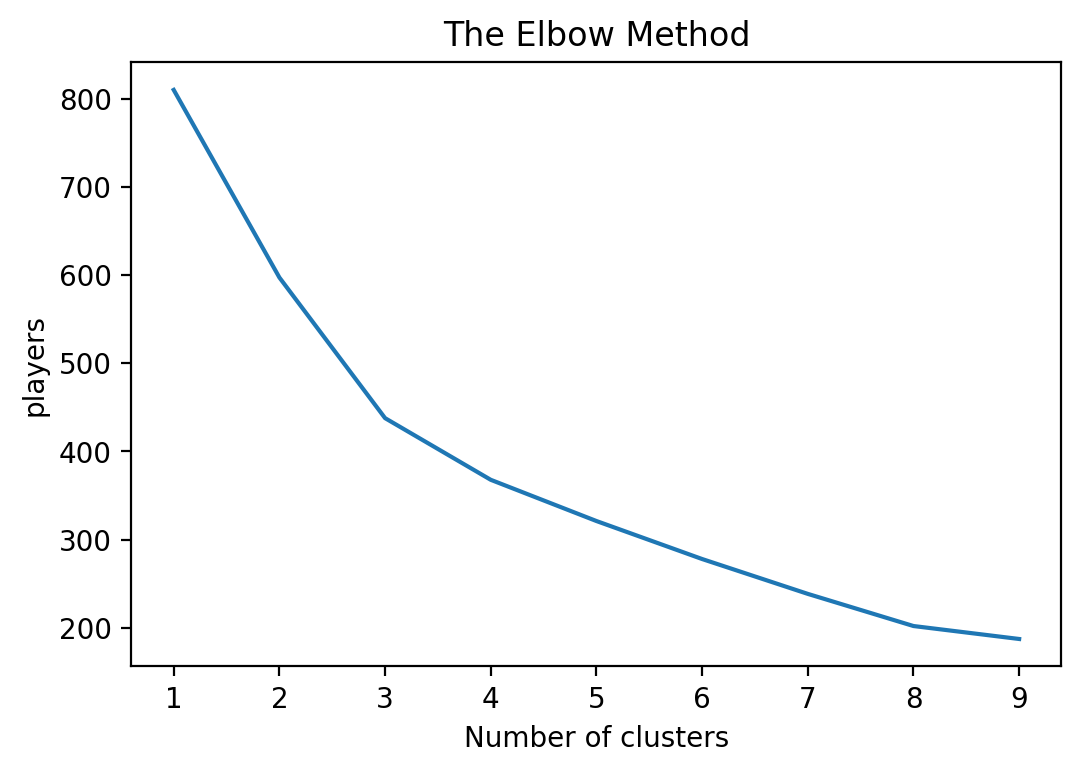

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 2, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 0])

In [28]:
kmeans.cluster_centers_

array([[-0.5698831 , -0.46785842, -0.44281947, -0.34780141, -0.19977403,
        -0.12725623, -0.32171635,  0.01395333, -0.32104057, -0.29570808,
        -0.27086817, -0.30604342, -0.36722174, -0.0608069 , -0.5698831 ,
        -0.36737536, -0.3616271 , -0.29829907, -0.37409542, -0.35569135,
        -0.03056847,  0.04837804, -0.04256968, -0.39223227, -0.26726124,
        -0.37535676, -0.26726124],
       [ 1.43340827,  1.80062269,  0.74580121,  2.14031637,  1.57344957,
         1.40010845,  1.97211498,  0.44155297,  2.05843659,  2.00037818,
         0.27086817,  2.02415987,  2.09100376, -0.04283442,  1.43340827,
        -0.65281808, -0.66420326, -0.45393337, -0.68495449, -0.65769343,
        -0.51015545, -0.95855562, -0.50862472, -0.39223227, -0.26726124,
         1.28372011,  1.73719807],
       [ 0.94400484,  0.35911295,  0.97886409, -0.26753955, -0.38305295,
        -0.5092182 , -0.24235549, -0.34087974, -0.30215583, -0.34789186,
         0.72231512, -0.32929518, -0.16993006,  0.2312

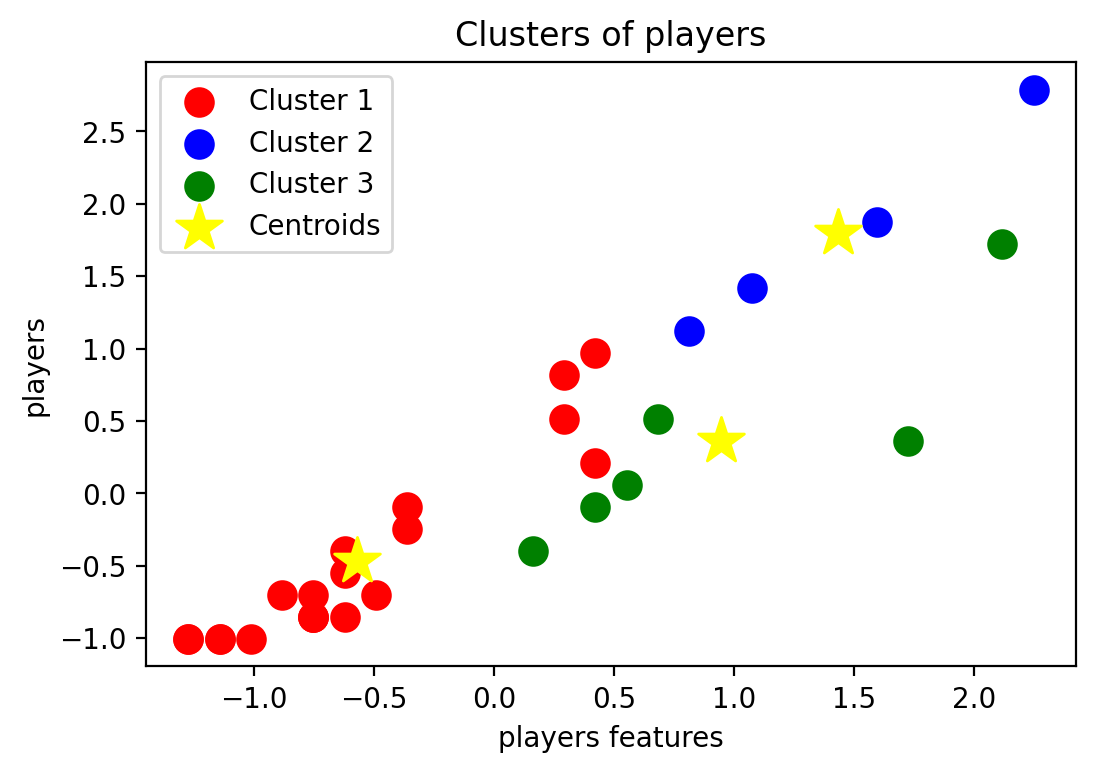

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
WestIndies_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,FA Allen (WI),8,6,3,64,51,21.33,49,130.61,0,...,229,4,2/40,57.25,6.18,55.5,0,0,5,0
1,SW Ambris (WI),8,7,1,323,148,53.83,327,98.77,1,...,-,-,-,-,-,-,-,-,2,0
2,D Bishoo (WI),5,2,1,9,9*,9.00,9,100.00,0,...,170,1,1/78,170.00,7.08,144.0,0,0,0,0
3,CR Brathwaite (WI),16,11,1,236,101,23.60,223,105.82,1,...,603,17,4/63,35.47,6.68,31.8,1,0,2,0
4,DM Bravo (WI),13,11,3,188,61,23.50,211,89.09,0,...,-,-,-,-,-,-,-,-,3,0
5,JD Campbell (WI),6,5,0,248,179,49.60,214,115.88,1,...,13,0,-,-,13.00,-,0,0,0,0
6,JL Carter (WI),5,3,1,57,43*,28.50,58,98.27,0,...,19,1,1/19,19.00,9.50,12.0,0,0,0,0
7,RL Chase (WI),14,9,1,321,94,40.12,393,81.67,0,...,362,8,3/30,45.25,4.52,60.0,0,0,4,0
8,SS Cottrell (WI),24,10,5,62,17,12.40,79,78.48,0,...,1024,31,5/46,33.03,5.80,34.1,1,1,17,0
9,SO Dowrich (WI),1,1,0,6,6,6.00,8,75.00,0,...,-,-,-,-,-,-,-,-,0,0


In [31]:
WestIndies_2019["cluster"] = y_kmeans

In [32]:
WestIndies_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,FA Allen (WI),8,6,3,64,51,21.33,49,130.61,0,...,4,2/40,57.25,6.18,55.5,0,0,5,0,0
1,SW Ambris (WI),8,7,1,323,148,53.83,327,98.77,1,...,-,-,-,-,-,-,-,2,0,0
2,D Bishoo (WI),5,2,1,9,9*,9.00,9,100.00,0,...,1,1/78,170.00,7.08,144.0,0,0,0,0,0
3,CR Brathwaite (WI),16,11,1,236,101,23.60,223,105.82,1,...,17,4/63,35.47,6.68,31.8,1,0,2,0,2
4,DM Bravo (WI),13,11,3,188,61,23.50,211,89.09,0,...,-,-,-,-,-,-,-,3,0,0
5,JD Campbell (WI),6,5,0,248,179,49.60,214,115.88,1,...,0,-,-,13.00,-,0,0,0,0,0
6,JL Carter (WI),5,3,1,57,43*,28.50,58,98.27,0,...,1,1/19,19.00,9.50,12.0,0,0,0,0,0
7,RL Chase (WI),14,9,1,321,94,40.12,393,81.67,0,...,8,3/30,45.25,4.52,60.0,0,0,4,0,0
8,SS Cottrell (WI),24,10,5,62,17,12.40,79,78.48,0,...,31,5/46,33.03,5.80,34.1,1,1,17,0,2
9,SO Dowrich (WI),1,1,0,6,6,6.00,8,75.00,0,...,-,-,-,-,-,-,-,0,0,0


In [33]:
WestIndies_2019['cluster'].value_counts()

0    20
2     6
1     4
Name: cluster, dtype: int64

In [34]:
WestIndies_Cluster_2019 = np.array([20,4,6])

In [35]:
WestIndies_Cluster_2019

array([20,  4,  6])

In [36]:
%store WestIndies_Cluster_2019

Stored 'WestIndies_Cluster_2019' (ndarray)


In [37]:
WestIndies_2019_players_scaled.insert(0, 'Player', WestIndies_2019.Player)

In [38]:
WestIndies_2019_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,FA Allen (WI),-0.361071,-0.247839,1.095396,-0.525170,-0.190610,-0.291600,-0.541939,1.460048,-0.491003,...,-0.453933,0.027539,-0.187912,0.853033,0.477777,0.909443,-0.392232,-0.267261,0.120114,-0.267261
1,SW Ambris (WI),-0.361071,-0.096101,-0.302982,0.330296,1.587195,1.592747,0.258871,0.355804,0.642081,...,-0.453933,-0.767399,-0.724805,-0.866913,-1.377298,-0.931557,-0.392232,-0.267261,-0.330314,-0.267261
2,D Bishoo (WI),-0.752594,-0.854790,-0.302982,-0.706833,-0.960382,-1.006493,-0.657164,0.398462,-0.491003,...,-0.453933,-0.177270,-0.590582,4.240350,0.747934,3.845092,-0.392232,-0.267261,-0.630599,-0.267261
3,CR Brathwaite (WI),0.682990,0.510851,-0.302982,0.042938,0.725785,-0.159986,-0.040713,0.600305,0.642081,...,-0.064848,1.325823,1.556989,0.198703,0.627864,0.123286,2.549510,-0.267261,-0.330314,-0.267261
4,DM Bravo (WI),0.291467,0.510851,1.095396,-0.115604,-0.007331,-0.165784,-0.075280,0.020092,-0.491003,...,-0.453933,-0.767399,-0.724805,-0.866913,-1.377298,-0.931557,-0.392232,-0.267261,-0.180171,-0.267261
5,JD Campbell (WI),-0.622086,-0.399576,-1.002170,0.082574,2.155360,1.347492,-0.066638,0.949196,0.642081,...,-0.453933,-0.722271,-0.724805,-0.866913,2.524964,-0.931557,-0.392232,-0.267261,-0.630599,-0.267261
6,JL Carter (WI),-0.752594,-0.703052,-0.302982,-0.548291,-0.337233,0.124116,-0.516014,0.338464,-0.491003,...,-0.453933,-0.701443,-0.590582,-0.296101,1.474355,-0.533503,-0.392232,-0.267261,-0.630599,-0.267261
7,RL Chase (WI),0.421975,0.207375,-0.302982,0.323690,0.597489,0.797842,0.448991,-0.237241,-0.491003,...,-0.064848,0.489228,0.348980,0.492520,-0.020512,1.058713,-0.392232,-0.267261,-0.030029,-0.267261
8,SS Cottrell (WI),1.727050,0.359113,2.493773,-0.531776,-0.813758,-0.809361,-0.455521,-0.347874,-0.491003,...,2.658753,2.787260,3.436113,0.125398,0.363711,0.199580,2.549510,3.741657,1.921827,-0.267261
9,SO Dowrich (WI),-1.274624,-1.006528,-1.002170,-0.716742,-1.015365,-1.180432,-0.660044,-0.468564,-0.491003,...,-0.453933,-0.767399,-0.724805,-0.866913,-1.377298,-0.931557,-0.392232,-0.267261,-0.630599,-0.267261


In [39]:
WestIndies_2019_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,FA Allen (WI),-0.291600,0.853033
1,SW Ambris (WI),1.592747,-0.866913
2,D Bishoo (WI),-1.006493,4.240350
3,CR Brathwaite (WI),-0.159986,0.198703
4,DM Bravo (WI),-0.165784,-0.866913
5,JD Campbell (WI),1.347492,-0.866913
6,JL Carter (WI),0.124116,-0.296101
7,RL Chase (WI),0.797842,0.492520
8,SS Cottrell (WI),-0.809361,0.125398
9,SO Dowrich (WI),-1.180432,-0.866913


In [40]:
WestIndies_2019_Ave=WestIndies_2019_players_scaled.mean()

In [41]:
WestIndies_2019_Ave

Mat_x          -7.031412e-17
Inns_x         -7.401487e-18
NO             -7.401487e-18
Runs_x          1.850372e-17
HS              1.110223e-17
Ave_x           1.110223e-16
BF             -1.110223e-17
SR_x            5.643634e-17
100             1.850372e-17
50             -3.700743e-17
0               3.700743e-17
4s              5.921189e-17
6s             -2.220446e-17
Unnamed: 0_y   -8.141636e-17
Mat_y          -7.031412e-17
Inns_y          6.221875e-17
Overs          -8.141636e-17
Mdns           -9.251859e-18
Runs_y          2.405483e-17
Wkts           -4.996004e-17
Ave_y          -3.515706e-17
Econ           -1.387779e-16
SR_y            2.405483e-17
4              -2.035409e-17
5               4.070818e-17
Ct              2.960595e-17
St              4.440892e-17
dtype: float64

In [42]:
WestIndies_Ave_2019 =WestIndies_2019_Ave[['Ave_x','Ave_y']]

In [43]:
WestIndies_Ave_2019

Ave_x    1.110223e-16
Ave_y   -3.515706e-17
dtype: float64

In [44]:
WestIndies_Ave_2019 = np.array([WestIndies_Ave_2019.Ave_x, WestIndies_Ave_2019.Ave_y])

In [45]:
WestIndies_Ave_2019

array([ 1.11022302e-16, -3.51570624e-17])

In [46]:
%store WestIndies_Ave_2019

Stored 'WestIndies_Ave_2019' (ndarray)


In [47]:
WestIndies_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,FA Allen (WI),8,6,3,64,51,21.33,49,130.61,0,...,4,2/40,57.25,6.18,55.5,0,0,5,0,0
1,SW Ambris (WI),8,7,1,323,148,53.83,327,98.77,1,...,-,-,-,-,-,-,-,2,0,0
2,D Bishoo (WI),5,2,1,9,9*,9.00,9,100.00,0,...,1,1/78,170.00,7.08,144.0,0,0,0,0,0
3,CR Brathwaite (WI),16,11,1,236,101,23.60,223,105.82,1,...,17,4/63,35.47,6.68,31.8,1,0,2,0,2
4,DM Bravo (WI),13,11,3,188,61,23.50,211,89.09,0,...,-,-,-,-,-,-,-,3,0,0
5,JD Campbell (WI),6,5,0,248,179,49.60,214,115.88,1,...,0,-,-,13.00,-,0,0,0,0,0
6,JL Carter (WI),5,3,1,57,43*,28.50,58,98.27,0,...,1,1/19,19.00,9.50,12.0,0,0,0,0,0
7,RL Chase (WI),14,9,1,321,94,40.12,393,81.67,0,...,8,3/30,45.25,4.52,60.0,0,0,4,0,0
8,SS Cottrell (WI),24,10,5,62,17,12.40,79,78.48,0,...,31,5/46,33.03,5.80,34.1,1,1,17,0,2
9,SO Dowrich (WI),1,1,0,6,6,6.00,8,75.00,0,...,-,-,-,-,-,-,-,0,0,0
